## Taller de ML con DataBricks
**Pontificia Universidad Javeriana**<br />
**Hecho por: Juan Sebastián Clavijo Martínez**<br />
TEMA: Comparación de metricas de rendimiento entre diferentes modelos de clasificación<br />
Fecha: 23-10-2023<br />
Notas: 

**Clasificadores a usar**<br />
- clasificador random forest
- clasificador gradiente descendiente
- clasificador soporte vectorial

grid search - cv score<br />

Objetivo: Comparar los diferentes algoritmos de ML para la calidad del vino. La idea principal es jugar con clasificacion binaria 

In [1]:
#Parte 1: preprocesamiento de datos - importado de bibliotecas pertinentes
import pandas as pd #tratamiento de datos en un dataframe
import numpy as np #numerical python
import seaborn as sns #biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt #biblioteca para vizualizacion de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder #standar sacler para normalizacion y encoder para codificacion

In [2]:
#Parte 1.1: carga de datos
#se traen los datos del repositorio
url = 'https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv'
#se hace el obj dataframe
df_wines_01 = pd.read_csv(url,delimiter=";")
#vamos a presntar los primeros 5 renglones 
df_wines_01.head(10) #inspección visual

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
#Parte 1.2: presentacion general del df
df_wines_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observaciones**<br />
  - hay 1599 registros
  - indice del 0 al 1598
  - solo hay datos de tipo float64 o int64
  - hay 12 columnas, que contienen informacion sobre el vino como nivel de ph, acido cirtico, alcohol, y azucar residual entre otras
  - al pareceer no hay datos nulos

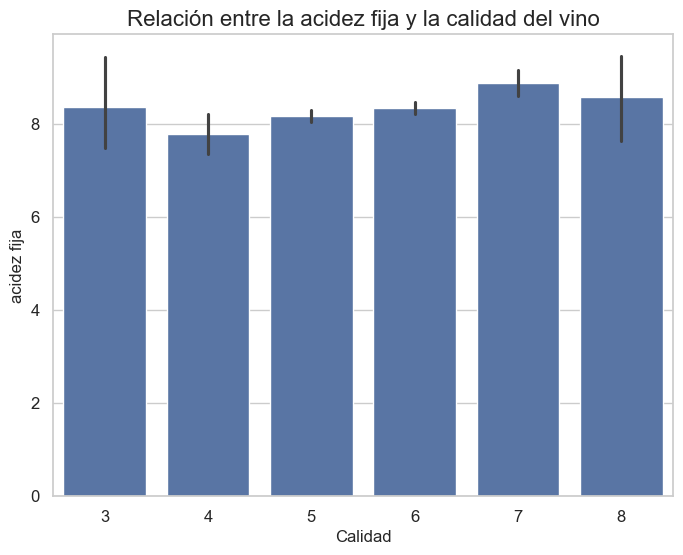

In [4]:
# Parte 1.3: gráficas
#   "una grafica dice más que mil palabras" -anónimo
#  se requiere graficar todas las caracteristicas vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='fixed acidity', data=df_wines_01)
plt.title("Relación entre la acidez fija y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("acidez fija", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

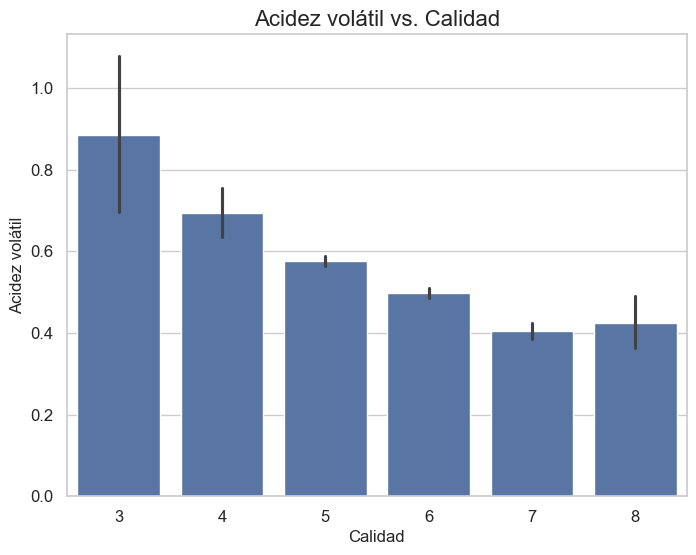

In [5]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='volatile acidity', data=df_wines_01)
plt.title("Acidez volátil vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Acidez volátil", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

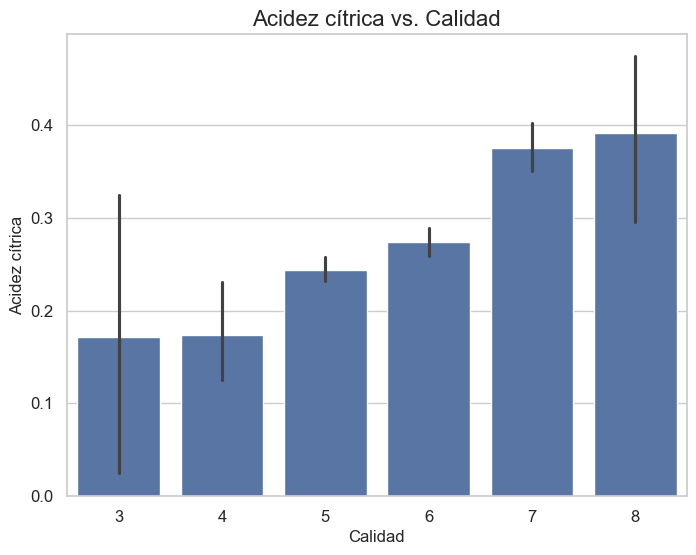

In [6]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='citric acid', data=df_wines_01)
plt.title("Acidez cítrica vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Acidez cítrica", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

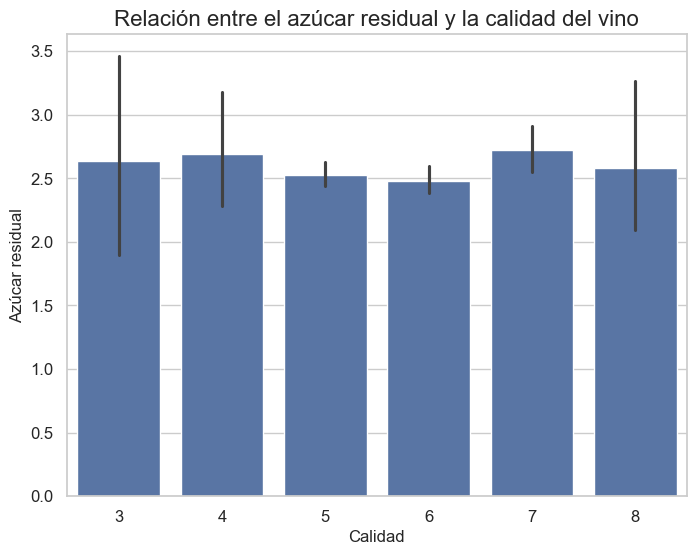

In [7]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='residual sugar', data=df_wines_01)
plt.title("Relación entre el azúcar residual y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Azúcar residual", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

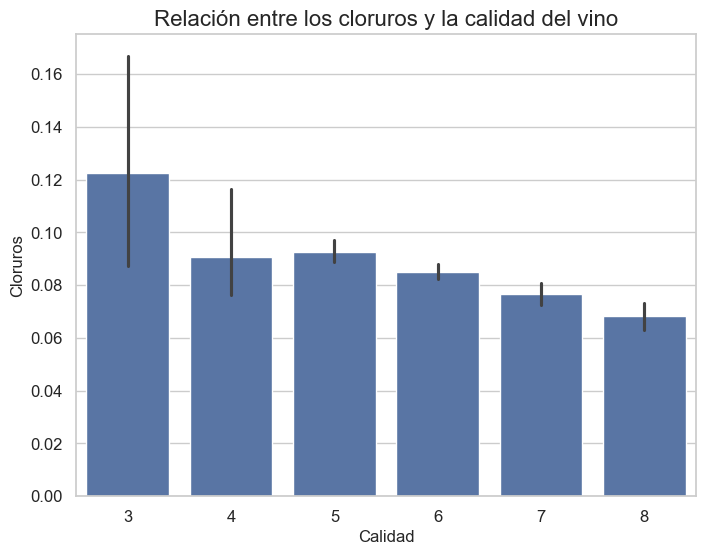

In [8]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='chlorides', data=df_wines_01)
plt.title("Relación entre los cloruros y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Cloruros", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

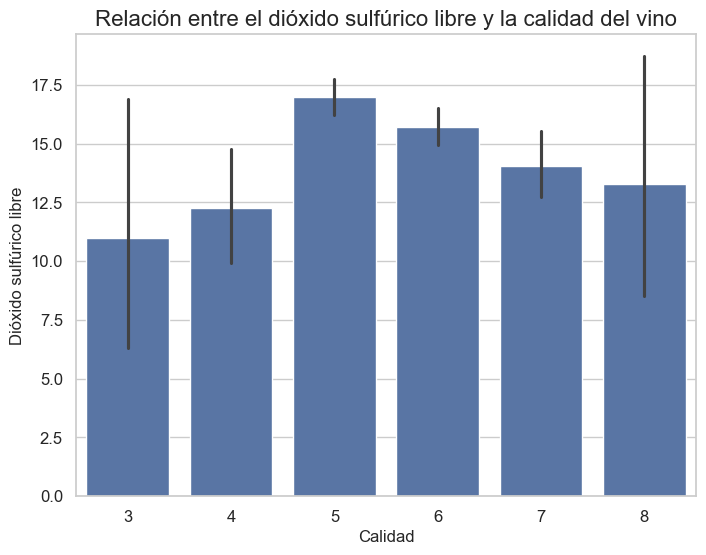

In [9]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=df_wines_01)
plt.title("Relación entre el dióxido sulfúrico libre y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Dióxido sulfúrico libre", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

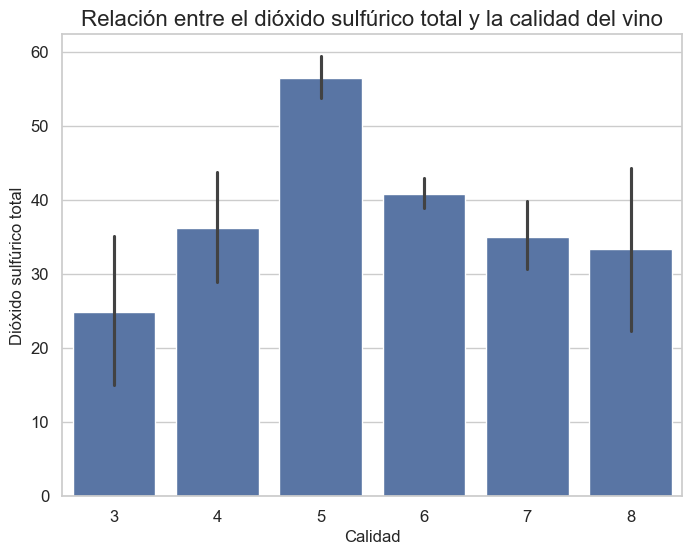

In [10]:
# Parte 1.3: gráficas
#   "una gráfica dice más que mil palabras" -anónimo
# se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=df_wines_01)
plt.title("Relación entre el dióxido sulfúrico total y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Dióxido sulfúrico total", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

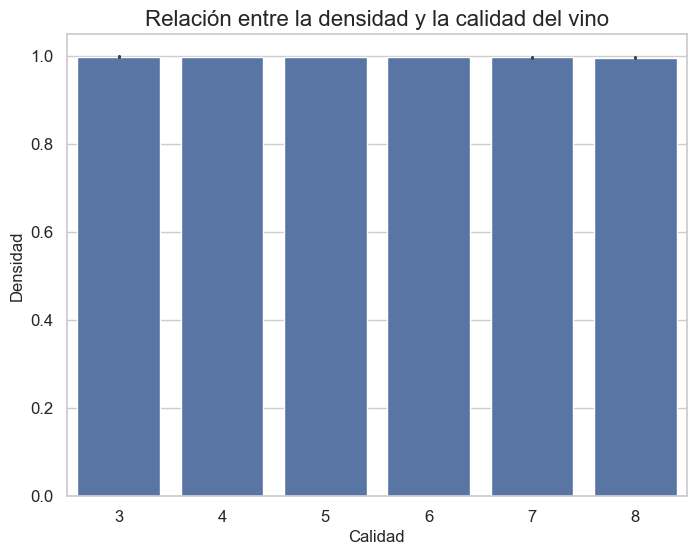

In [11]:
# Parte 1.3: gráficas
#   "una grafica dice más que mil palabras" -anónimo
# se requiere graficar todas las caracteristicas vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='density', data=df_wines_01)
plt.title("Relación entre la densidad y la calidad del vino", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

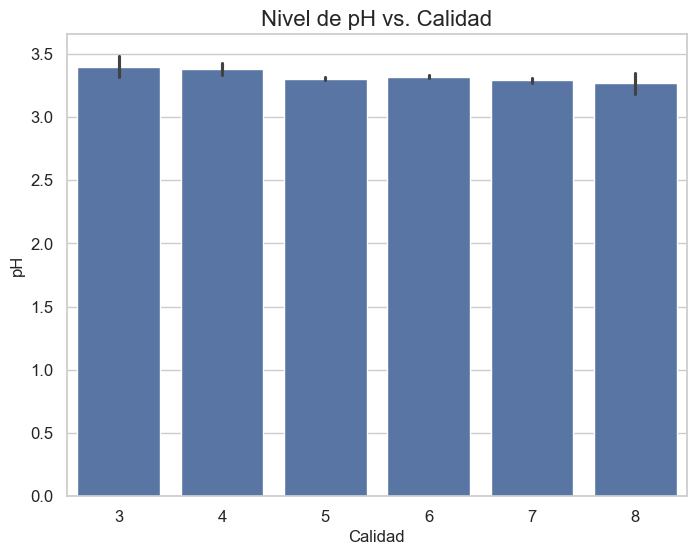

In [12]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='pH', data=df_wines_01)
plt.title("Nivel de pH vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("pH", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

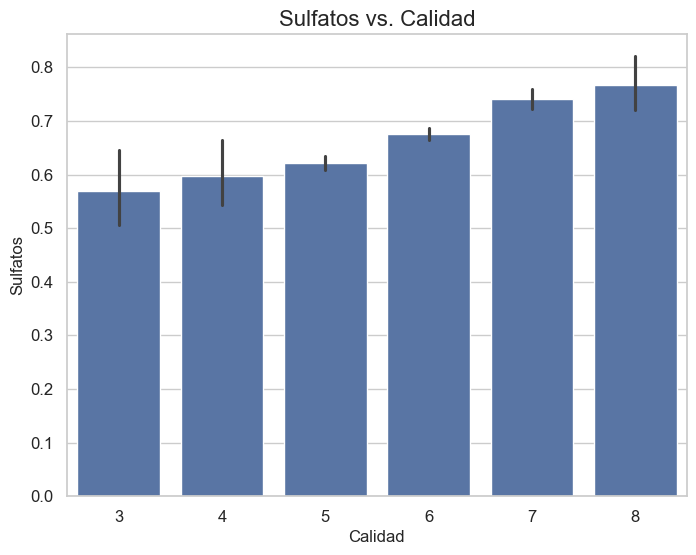

In [13]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='sulphates', data=df_wines_01)
plt.title("Sulfatos vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Sulfatos", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

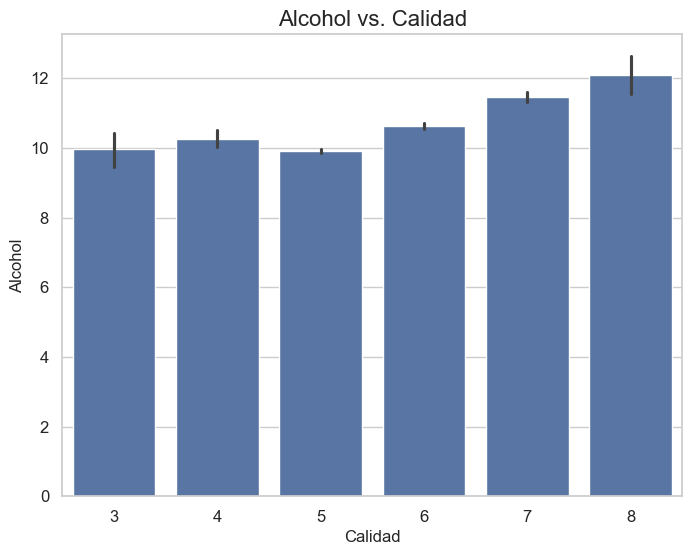

In [14]:
# Parte 1.3: gráficas
#   "Una gráfica dice más que mil palabras" - Anónimo
# Se requiere graficar todas las características vs. la calidad
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='alcohol', data=df_wines_01)
plt.title("Alcohol vs. Calidad", fontsize=16)
plt.xlabel("Calidad", fontsize=12)
plt.ylabel("Alcohol", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [15]:
#Parte 1.4: limpieza
# Se presentan la sumatoria de datos nulos o duplicados
desaparecidos = len(df_wines_01)-len(df_wines_01.dropna())
Cantidad = len(df_wines_01)
print('Cantidad de datos NaN',desaparecidos)
print('Cantidad de datos duplicados', df_wines_01.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_wines_01.dropna(inplace=True)
#Se reinicia el indice por los elementos eliminados
df_wines_01.reset_index(drop = True, inplace = True)

Cantidad de datos NaN 0
Cantidad de datos duplicados 240


**Se toma la desicion de dejar los datos duplicados, con el proposito de hacer una comparación entre el rendimiento de los algoritmos**

In [16]:
#Parte 1.5: Se observan los valores de la colunma calidad 
df_wines_01['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
#Parte 2: codificación y preparación para los algoritmos de ML
#Para hacer la division en binario, se haran 2 categorías: Bueno y Malo. Estas dos clases se definirán entre 2 y 8 
clases = (2,6.5,8)
nombres = ['Malo','Bueno']
#Se sobreescribirá, bajo mi responsabilidad la columna target (quality)
df_wines_01['quality'] = pd.cut(df_wines_01['quality'],bins=clases,labels=nombres)

In [18]:
#Parte 2.1: Se crea un obj. del tipo codificaor de etiquetas (LabelEncoder)
codificador = LabelEncoder()

In [19]:
#Parte 2.2: Ajustamos y codificamos 0=malo, 1=bueno
df_wines_01['quality'] = codificador.fit_transform(df_wines_01['quality'])

In [20]:
#Parte 2.3: Hacemos cuenta de cuantos buenos y cuantos malos
df_wines_01['quality'].value_counts()

quality
1    1382
0     217
Name: count, dtype: int64

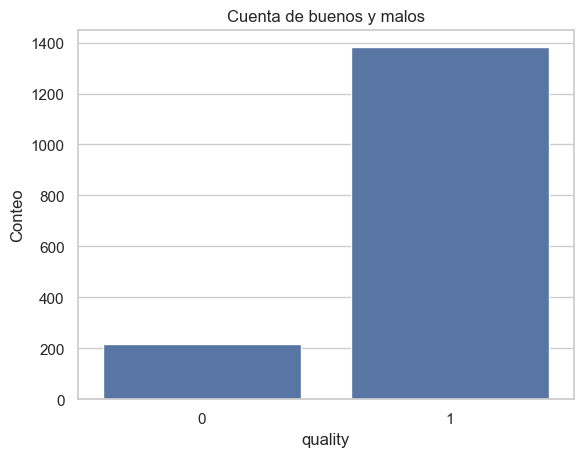

In [21]:
#Parte 2.4: Se grafic buenos y malos
sns.countplot(x=df_wines_01['quality'])
plt.title("Cuenta de buenos y malos")
plt.ylabel("Conteo", fontsize=12)
plt.show()

In [22]:
#Parte 2.5: Se separan los datos para entrenamiento y pruebas, se importa la biblioteca correspondiente
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# se dividen en 2 grupos X representa las vars. ind. 
X = df_wines_01.drop(['quality'],axis=1)
# y representa las vars. dep.
y = df_wines_01['quality']
#se dividen el 80% de los datos para training y el resto para prueba
#La funcion retorna 4 grupos, de la linea de arriba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [23]:
#Parte 2.6: Aplicamos escalamiento estandar (normalización) para optimizacion de los resultados, se estandarizan los datos, que la magnitud de los datos sea coherente con las demás columnas.
normalizacion = StandardScaler() 

In [24]:
#Parte 2.7: Solo a los datos de entrenamiento y prueba de mis vars. indep, de prueba y entrenamiento, se la hará la normalización
X_train_norm = normalizacion.fit_transform(X_train)
X_test_norm = normalizacion.fit_transform(X_test)

In [25]:
#Parte 3: Se aplica el clasificador Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
bosques = RandomForestClassifier(n_estimators=200)
bosques.fit(X_train_norm,y_train)
pred_bosques= bosques.predict(X_test_norm)

In [26]:
#Parte 3.1: metricas de rendimiento
from sklearn.metrics import confusion_matrix, classification_report
#se presenta el rendimiento del clasificador
print(f"Reporte de metricas de rendimiento\n {classification_report(y_test,pred_bosques)}")

Reporte de metricas de rendimiento
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        48
           1       0.92      0.98      0.95       272

    accuracy                           0.91       320
   macro avg       0.87      0.76      0.80       320
weighted avg       0.91      0.91      0.90       320



In [27]:
#Parte 3.2 Se presenta la matriz de confusión y se hacen observaciones MAÑANA HASTA EL MEDIO DIA
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_bosques)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[ 26  22]
 [  6 266]]


**OBSERVACIONES SOBRE MATRIZ DE CONFUSION**

La matriz de confusión proporcionada muestra los resultados del modelo usado, el random forest classifier. En esta matriz, los valores en la diagonal principal representan las predicciones correctas, donde 23 casos han sido correctamente clasificados como verdaderos negativos (TN) y 267 como verdaderos positivos (TP). Los valores fuera de la diagonal principal indican errores en la clasificación. En este caso, el modelo cometió 25 falsos positivos (FP), lo que significa que predijo incorrectamente 25 casos como positivos cuando en realidad eran negativos, y 5 falsos negativos (FN), lo que indica que se clasificaron erróneamente como negativos 5 casos que en realidad eran positivos.

**OBSERVACIONES SOBRE METRICAS DE RENDIMIENTO**

El informe de métricas de rendimiento proporciona una visión completa de la capacidad de un modelo de clasificación para predecir correctamente las clases en un conjunto de datos. En este informe, se presentan varias métricas clave. La precisión, que mide la proporción de predicciones positivas correctas con respecto al total de predicciones positivas y negativas, es del 91%, lo que indica que el modelo tiene una alta precisión en la predicción de las clases.

El recall, también conocido como sensibilidad, mide la proporción de casos positivos reales que el modelo predijo correctamente. En este caso, el recall para la clase 1 es del 98%, lo que sugiere que el modelo es muy bueno identificando verdaderos positivos.

El valor F1-score es una medida que combina la precisión y el recall en una sola métrica, proporcionando un equilibrio entre ambos. La puntuación F1 para la clase 1 es alta, alcanzando un 0.95, lo que indica un buen equilibrio entre la precisión y la exhaustividad en la clasificación de la clase positiva.

La métrica de exactitud (accuracy) muestra la proporción de predicciones correctas en general, y en este caso, es del 91%, lo que confirma que el modelo tiene un rendimiento sólido en la clasificación.

**EN CONCLUSION**

Para finalizar este taller, es necesario señalar, frente a la matriz de confusión, que hay un número significativo de falsos positivos, lo que indica que el modelo a veces clasifica incorrectamente las muestras negativas como positivas. Por otro lado, hay pocos flasos negativos, lo que indica que el modelo se desempeña bien cuando de identificar muestras positivas reales se trata. El modelo podíra beneficiarse de una mejora en la reducción de falsos positivos. Frente a las métricas de rendimiento, el modelo es ciertamente preciso, es posible afirmar que es capaz de predecir correctamente si un vino es bueno. Con respecto a la capacidad de prediccion de los vinos malos, la precision es del 82%, cosa que puede resultar en falsos positivos. Con respecto al F1-score, muestra que el modelo tiene un buen equilibrio para la clase 1, pero podría mejorar para la clase 0. Finalmente el informe destaca la necesidad de ajustar el modelo para reducir los falsos positivos en la clase 0 y mejorar aun mas su rendimiento general